# Project: Absenteeism_at_work

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li> 
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#linreg">Linear Regression Models</a></li>
<li><a href="#logreg">Logestic Regression Models</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Descriptions:** This dataset was created with records of absence at work from July 2007 to July 2010 at a courier company in Brazil.


 **Dataset columns description:**

- **Individual identification (ID)**:the unique identifier for each employee.
- **Reason for absence (ICD)**: 
> **Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:**
   > * (0) Ther is no absence.  
   > * (1) Certain infectious and parasitic diseases  
   > * (2) Neoplasms  
   > * (2) Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism        > * (4) Endocrine, nutritional and metabolic diseases  
   > * (5) Mental and behavioural disorders  
   > * (6) Diseases of the nervous system  
   > * (7) Diseases of the eye and adnexa  
   > * (8) Diseases of the ear and mastoid process  
   > * (9) Diseases of the circulatory system  
   > * (10) Diseases of the respiratory system  
   > * (11) Diseases of the digestive system  
   > * (12) Diseases of the skin and subcutaneous tissue  
   > * (13) Diseases of the musculoskeletal system and connective tissue  
   > * (14) Diseases of the genitourinary system  
   > * (15) Pregnancy, childbirth and the puerperium   
   > * (16) Certain conditions originating in the perinatal period  
   > * (17) Congenital malformations, deformations and chromosomal abnormalities  
   > * (18) Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
   > * (19) Injury, poisoning and certain other consequences of external causes  
   > * (20) External causes of morbidity and mortality  
   > * (21) Factors influencing health status and contact with health services.
   > * (22) Factors influencing health status and contact with health services.
   
    > **And 7 categories without (CID) patient follow-up as follows:**

   > * (23) blood donation.
   > * (24) aboratory examination.
   > * (25) unjustified absence.
   > * (26) physiotherapy.
   > * (27) dental consultation.
   > * (28) Month of absence.

    
    
- **Month of absence**: (Jan (1), Feb (2), Mar (3) ... ect)
- **Day of the week**: (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
- **Seasons**: (summer (1), autumn (2), winter (3), spring (4)) 
- **Transportation expense**.
- **Distance from Residence to Work**: (kilometers)
- **Service time**.
- **Age**.
- **Work load Average/day**.
- **Hit target**.
- **Disciplinary failure**: (yes=1; no=0)
- **Education**: (high school (1), graduate (2), postgraduate (3), master and doctor (4))
- **Son**: (number of children)
- **Social drinker**: (yes=1; no=0)
- **Social  smoker**: (yes=1; no=0)
- **Pet**: (number of pet)
- **Weight**.
- **Height**.
- **Body mass index**.
- **Absenteeism time in hours**.


 **Source:**

Creators original owner and donors: Andrea Martiniano (1), Ricardo Pinto Ferreira (2), and Renato Jose Sassi (3).

E-mail address: 
andrea.martiniano'@'gmail.com (1) - PhD student;
log.kasparov'@'gmail.com (2) - PhD student;
sassi'@'uni9.pro.br (3) - Prof. Doctor.

Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.

Address: Rua Vergueiro, 235/249 Liberdade, Sao Paulo, SP, Brazil. Zip code: 01504-001.

Website: http://www.uninove.br/curso/informatica-e-gestao-do-conhecimento/




## **Questions:**


1.  What is the most frequent reason for absences?
2.  Which absence reasons have higher rate medical or non medical reasons?  
3.  Who are the best employees and the worst employees compared by total absence hours?
4.  Which month and day have the higher total absence hours?
5.  Which variables have strong correlation with absence hours?   
6.  Which variables are statistically significant to predict absence and total absence hours? (Regression models)
      

### importing libraries that will be used to investigate Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [108]:
# loading CSV file into 3 Dataframe //df

df = pd.read_csv("Absenteeism_at_work.csv", sep=";")

In [109]:
#checking 5 rows sample from Dataframes

df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


### Assessing Data

In [110]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [111]:
#checking Dataframe shape (number of rows and columns)

df.shape

(740, 21)

In [112]:
#checking more information and descriptive statistics

df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [113]:
# checking for NaN values patients

df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [114]:
#checking for duplicated rows 

df.duplicated().sum()

34

In [115]:
# check month of absence value_counts 
df["Month of absence"].value_counts().sort_index()

0      3
1     50
2     72
3     87
4     53
5     64
6     54
7     67
8     54
9     53
10    71
11    63
12    49
Name: Month of absence, dtype: int64

In [116]:
# check day of week value_counts 
df["Day of the week"].value_counts().sort_index()

2    161
3    154
4    156
5    125
6    144
Name: Day of the week, dtype: int64

In [117]:
# check Seasons value_counts 
df["Seasons"].value_counts().sort_index()

1    170
2    192
3    183
4    195
Name: Seasons, dtype: int64

In [118]:
# check Pets value_counts 
df.Pet.value_counts().sort_index()

0    460
1    138
2     96
4     32
5      6
8      8
Name: Pet, dtype: int64

**We have 2 columns to check if employee made absence or not (Reason for absence and Absenteeism time in hours) so we need to assure there is no conflict between both of them.**

In [119]:
df[(df["Reason for absence"] == 0) &(df["Absenteeism time in hours"] != 0)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


In [120]:
df[(df["Reason for absence"] != 0) &(df["Absenteeism time in hours"] == 0)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
134,34,27,1,2,2,118,10,10,37,308.593,...,0,1,0,0,0,0,83,172,28,0


## From above data we can observe that: 

> **1.There are 34 duplicate values but we cannot consider this as duplicate records because same employee can make absence due to same reason specially for medical reasons.**

> **2. Dataset has 740 records without any missing or empty data.**

> **3. There are 8 employes who have 8 pets and other 6  who have 6 pets which are large numbers of pets to have. We need to ensure this information is correct.**

> **4. There are 3 records on Month of absence column have value of 0 while other 49 have value of 12. I Assume this is a typo mistake where 0 inserted instead of 1.**

> **5. The employee with ID 34 has dental consultation reason for absence but his Absenteeism time in hours is 0 so we can consider him as not absent. I will use Absenteeism time in hours to concider there is absence or not.**

##  Cleaning Data

### <font color='blue'>Missing Data</font>

 * **(There is no missing records in this dataset)**
 

### <font color='blue'>Tidiness issues</font>

 * **(This dataset is tidy)**
 
 
### <font color='blue'>Quality issues</font>

##### 1. **Change columns names for readability and easy accessibility (remove spaces and make names shorter)*


##### 2. **Change month_of_absence, day_of_the_week and seasons columns type to string.**


##### 3. **Replace months numbers with names and change 0 with 1.** 


##### 4. **Replace days numbers with names.** 


##### 5. **Replace seasons numbers with names.** 


##### 6. **Make new column for abcence and no absence (abcence = 1 and no absence = 0 ).**


##### 7. **Make new column for high, medium, low absence and no absence (high, med, low, no).**


##### 8. **Make new column for medical and non medical reasons (medical, not_medical and not_absent).**

In [121]:
# make copy of origenal dataframes to clean them

df_clean = df.copy()

### <font color='blue'>Fixing Quality issues</font>

#### 1. Change columns names for readability and easy accessibility (remove spaces and make names shorter).

##### Solution
* Change names using for loop and `df.columns`method.

##### Code

In [122]:
# creat new list with current columns names 

col_names = list(df_clean.columns)
col_names

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [123]:
# replace space with "_"

new_col_names=[]
for i in col_names:
    i = i.replace("/","_on_").strip()
    new_col_names.append (i.replace(" ","_").lower())
new_col_names

['id',
 'reason_for_absence',
 'month_of_absence',
 'day_of_the_week',
 'seasons',
 'transportation_expense',
 'distance_from_residence_to_work',
 'service_time',
 'age',
 'work_load_average_on_day',
 'hit_target',
 'disciplinary_failure',
 'education',
 'son',
 'social_drinker',
 'social_smoker',
 'pet',
 'weight',
 'height',
 'body_mass_index',
 'absenteeism_time_in_hours']

In [124]:
# assign new names to df_clean

df_clean.columns = new_col_names

##### Test

In [125]:
# confirm changes 

df_clean.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average_on_day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [126]:
# make copy from current dataframe to use it on regression models

df_reg = df_clean.copy()

#### 2. Change  month_of_absence, day_of_the_week and seasons columns type to string.

##### Solution
* change data type using `.astype()` method.

##### Code

In [127]:
df_clean.month_of_absence = df_clean.month_of_absence.astype(str)
df_clean.day_of_the_week = df_clean.day_of_the_week.astype(str)
df_clean.seasons = df_clean.seasons.astype(str)

##### Test

In [128]:
# confirm changes

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               740 non-null    int64  
 1   reason_for_absence               740 non-null    int64  
 2   month_of_absence                 740 non-null    object 
 3   day_of_the_week                  740 non-null    object 
 4   seasons                          740 non-null    object 
 5   transportation_expense           740 non-null    int64  
 6   distance_from_residence_to_work  740 non-null    int64  
 7   service_time                     740 non-null    int64  
 8   age                              740 non-null    int64  
 9   work_load_average_on_day         740 non-null    float64
 10  hit_target                       740 non-null    int64  
 11  disciplinary_failure             740 non-null    int64  
 12  education             

#### 3. Replace months numbers with names.

##### Solution
* Make new dictionary with months numbers and name 
* replace number values with names using `.replace()` method.

##### Code

In [130]:
# make new dic with months names

month_dic = {"0":"Jan",
            "1":"Jan",
            "2":"Feb",
            "3":"Mar",
            "4":"Apr",
            "5":"May",
            "6":"Jun",
            "7":"Jul",
            "8":"Aug",
            "9":"Sep",
            "10":"Nov",
            "11":"Oct",
            "12":"Dec"}

In [131]:
# change numbers with names 

df_clean.month_of_absence = df_clean.month_of_absence.replace(month_dic)

##### Test

In [137]:
# confirm changes

df_clean.month_of_absence.value_counts()

Mar    87
Feb    72
Nov    71
Jul    67
May    64
Oct    63
Aug    54
Jun    54
Sep    53
Jan    53
Apr    53
Dec    49
Name: month_of_absence, dtype: int64

#### 4. Replace days numbers with names.

##### Solution
* Make new dictionary with Days numbers and names 
* replace number values with names using `.replace()` method.

##### Code

In [138]:
day_dic = {"2":"Monday",
            "3":"Tuesday",
            "4":"Wednesday",
            "5":"Thursday",
            "6":"Friday",
            }

In [139]:
# change numbers with names 

df_clean.day_of_the_week = df_clean.day_of_the_week.replace(day_dic)

##### Test

In [140]:
# confirm changes

df_clean.day_of_the_week.value_counts()

Monday       161
Wednesday    156
Tuesday      154
Friday       144
Thursday     125
Name: day_of_the_week, dtype: int64

#### 5. Replace seasons numbers with names.

##### Solution
* Make new dictionary with Seasons numbers and names 
* replace number values with names using `.replace()` method.

##### Code

In [141]:
season_dic = {"1":"Summer",
            "2":"Autumn",
            "3":"Winter",
            "4":"Spring"
            }

In [142]:
# change numbers with names 

df_clean.seasons = df_clean.seasons.replace(season_dic)

##### Test

In [143]:
# Confirm changes

df_clean.seasons.value_counts()

Spring    195
Autumn    192
Winter    183
Summer    170
Name: seasons, dtype: int64

#### 6. Make new column for abcence and no absence (abcence = 1 and no absence = 0 )

##### Solution
* make new column using `np.where` depending on absenteeism_time_in_hours column

##### Code

In [144]:
df_clean["absence_status"] = np.where(df_clean.absenteeism_time_in_hours == 0 , 0, 1)

##### Test

In [145]:
# Confirm changes

df_clean.absence_status.value_counts(normalize=True)

1    0.940541
0    0.059459
Name: absence_status, dtype: float64

#### 7.Make new column for high, medium, low absence and no absence (high, med, low, no).

##### Solution
* make new column using `cut` function depending on minimum, first quartile, second quartile, third quartile and maximum.

##### Code

In [146]:
# checking absenteeism_time_in_hours describtion 

df_clean.absenteeism_time_in_hours.describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: absenteeism_time_in_hours, dtype: float64

In [147]:
bins = [0, 2, 3, 8, 120]
labls = ["No", "Low", "Medium", "High"]
df_clean["absence_level"] = pd.cut(df_clean.absenteeism_time_in_hours, bins, labels = labls, include_lowest=True, right=True)

##### Test

In [148]:
# Confirm changes 

df_clean["absence_level"].value_counts()

No        289
Medium    276
Low       112
High       63
Name: absence_level, dtype: int64

#### 8 Make new column for medical and non medical reasons (medical, not_medical and not_absent).

##### Solution
* Make new dictionary with absence reasons. 
* replace number values with names using `.replace()` method.

> **1. All records with 0 value indicates there is no absence.**

> **2. All values from 1 to 22 are medical absence cases.** 

> **3. All values from 23 to 28 are not medical cases.**

##### Code

In [149]:
reasons_dic={}
for i in range(29):
    if i ==0:
        reasons_dic[i] = "No_absence"
    elif i < 23: 
        reasons_dic[i] = "Medical"
    else:
        reasons_dic[i] = "Not_Medical"
reasons_dic

{0: 'No_absence',
 1: 'Medical',
 2: 'Medical',
 3: 'Medical',
 4: 'Medical',
 5: 'Medical',
 6: 'Medical',
 7: 'Medical',
 8: 'Medical',
 9: 'Medical',
 10: 'Medical',
 11: 'Medical',
 12: 'Medical',
 13: 'Medical',
 14: 'Medical',
 15: 'Medical',
 16: 'Medical',
 17: 'Medical',
 18: 'Medical',
 19: 'Medical',
 20: 'Medical',
 21: 'Medical',
 22: 'Medical',
 23: 'Not_Medical',
 24: 'Not_Medical',
 25: 'Not_Medical',
 26: 'Not_Medical',
 27: 'Not_Medical',
 28: 'Not_Medical'}

In [150]:
df_clean["absence_reason"] = df_clean.reason_for_absence
df_clean["absence_reason"] = df_clean.absence_reason.replace(reasons_dic)

##### Test

In [151]:
# Confirm changes 

df_clean.absence_reason.value_counts()

Not_Medical    397
Medical        300
No_absence      43
Name: absence_reason, dtype: int64

### Now this dataset is tidy and clean so let's explore it.

<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this data and try to find patterns in it, compute statistics and visualize the relationships
to answer the questions and detect the characteristics that affect patients attending to their hospital appointment


### Research Question 1
> ####  What is the most frequent reason for absences?

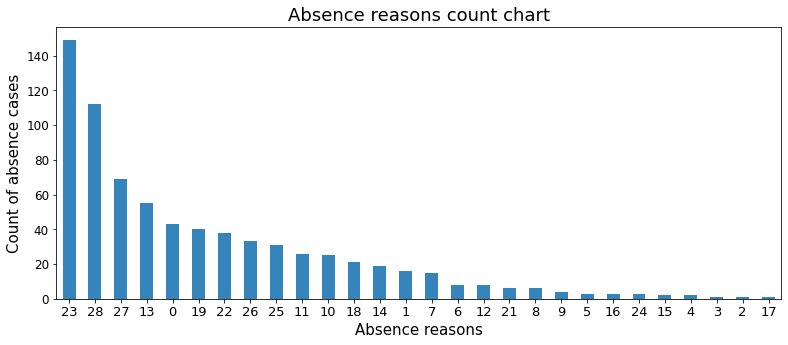

In [158]:
df_clean.reason_for_absence.value_counts().plot(kind="bar", 
                                                 rot=0, 
                                                 alpha=0.9, 
                                                 width = 0.5,
                                                 fontsize = 12,
                                                 figsize=(13,5)
                                               )
plt.xticks(fontsize=13)
plt.xlabel("Absence reasons", fontsize=15, color="k")
plt.ylabel("Count of absence cases", fontsize=15, color="k")
plt.title("Absence reasons count chart", fontsize=18, color="k");

### Answer 1

* **From above visualisation we can conclude that the most frequent reason for absences is blood donation which is represented by number (23) with 149 absence case.**

### Research Question 2
> ####  Which absence reasons have higher rate medical or non medical reasons?

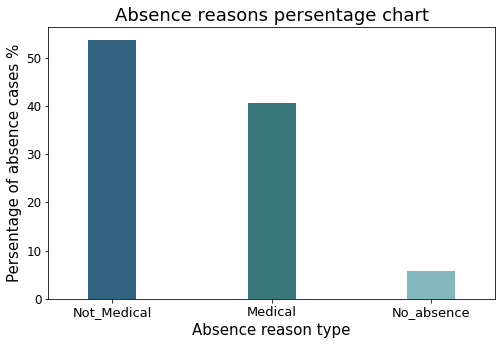

In [160]:
(df_clean.absence_reason.value_counts(normalize=True)*100).plot(kind="bar", 
                                                               rot=0,
                                                               alpha=0.8, 
                                                               color=["#003B64","#07575B","#66A5AD"],
                                                               width = 0.3,
                                                               figsize=(8,5),
                                                               fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel("Absence reason type", fontsize=15, color="k")
plt.ylabel("Persentage of absence cases %", fontsize=15, color="k")
plt.title("Absence reasons persentage chart", fontsize=18, color="k");


### Answer 2

* **From above visualisation we can conclude that 53.65% of absence cases reasons are not caused by medical reasons.**

### Research Question 3
> ####  Who are the best employees and the worst employees compared by total absence hours?

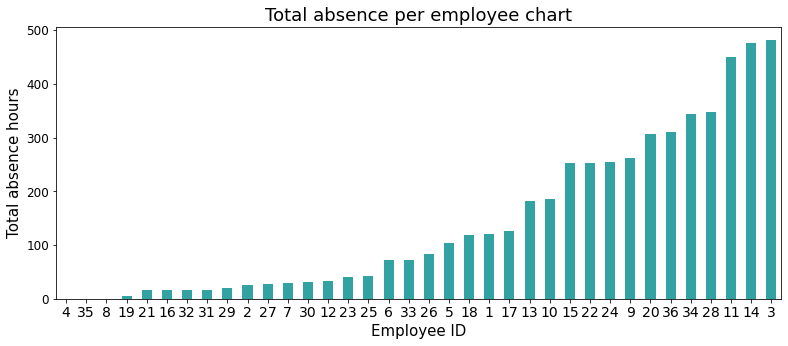

In [155]:
df_clean.groupby("id")["absenteeism_time_in_hours"].sum().sort_values().plot(kind="bar", 
                                                                               rot=0,
                                                                               alpha=0.8, 
                                                                               color=["darkcyan"],
                                                                               width = 0.5,
                                                                               figsize=(13,5),
                                                                               fontsize=12)

plt.xticks(fontsize=14)
plt.xlabel("Employee ID", fontsize=15, color="k")
plt.ylabel("Total absence hours", fontsize=15, color="k")
plt.title("Total absence per employee chart", fontsize=18, color="k");


### Answer 3

* **From above visualisation we can conclude that:**

#### The best employees are: 

> * Employee who has id number 4 with 0 hours absence.
> * Employee who has id number 8 with 0 hours absence.
> * Employee who has id number 35 with 0 hours absence.


#### The worst employees are: 

> * Employee who has id number 3 with 482 hours absence.
> * Employee who has id number 14 with 476 hours absence.
> * Employee who has id number 11 with 450 hours absence.

### Research Question 4
> ####  Which month and day have the higher total absence hours?

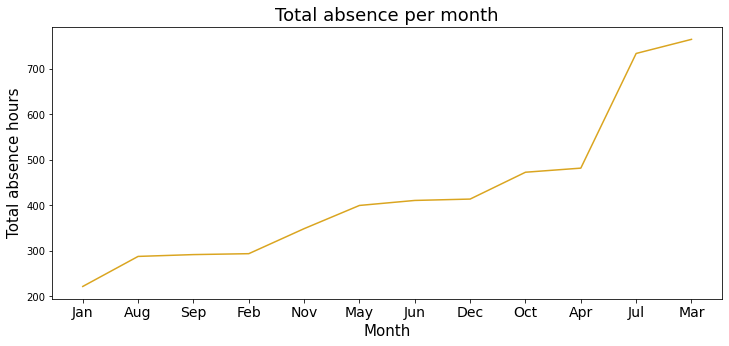

In [156]:
month = pd.DataFrame(df_clean.groupby("month_of_absence")["absenteeism_time_in_hours"].sum().sort_values())


plt.figure(figsize=(12,5))

sns.lineplot(x="month_of_absence",
             y="absenteeism_time_in_hours",
             data=month, color="goldenrod")


plt.xticks(fontsize=14)
plt.xlabel("Month", fontsize=15, color="k")
plt.ylabel("Total absence hours", fontsize=15, color="k")
plt.title("Total absence per month", fontsize=18, color="k");

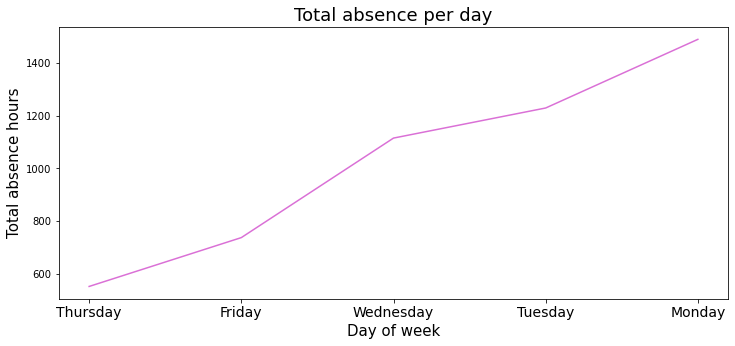

In [161]:
day = pd.DataFrame(df_clean.groupby("day_of_the_week")["absenteeism_time_in_hours"].sum().sort_values())


plt.figure(figsize=(12,5))

sns.lineplot(x="day_of_the_week",
             y="absenteeism_time_in_hours",
             data=day, color="orchid")


plt.xticks(fontsize=14)
plt.xlabel("Day of week", fontsize=15, color="k")
plt.ylabel("Total absence hours", fontsize=15, color="k")
plt.title("Total absence per day", fontsize=18, color="k");

### Answer 4

* **From above visualisation we can conclude that:**
> * March has the higher absence rate with total 765 hours.**
> * Monday has the higher absence rate with total 1489 hours.**
> * January has the lowest absence rate with total 222 hours.**
> * Thursday has the lowest absence rate with total 553 hours.**

### Research Question 5
> ####  Which variables have strong correlation with absence hours?

In [47]:
# check the correlation table 
df_clean.corr()

,id,reason_for_absence,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_on_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,absence_status
id,1.000000,-0.064245,-0.224163,-0.486160,-0.272704,0.040899,0.092457,0.018789,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997,-0.008938
reason_for_absence,-0.064245,1.000000,-0.119381,0.161831,0.048425,-0.078608,-0.123472,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116,0.554990
transportation_expense,-0.224163,-0.119381,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585,-0.083998
distance_from_residence_to_work,-0.486160,0.161831,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363,0.059649
service_time,-0.272704,0.048425,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029,-0.000811
age,0.040899,-0.078608,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760,-0.120212
work_load_average_on_day,0.092457,-0.123472,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749,-0.033067
hit_target,0.018789,0.088943,-0.080193,-0.013865,-0.007840,-0.039224,-0.089445,1.000000,-0.147971,0.101062,-0.014091,-0.102480,0.051254,0.007201,-0.044947,0.093267,-0.088939,0.026695,0.138995
disciplinary_failure,0.004502,-0.545054,0.109222,-0.056527,-0.000221,0.104304,0.029026,-0.147971,1.000000,-0.059298,0.072096,0.051838,0.116748,0.018881,0.072225,-0.010498,0.079428,-0.124248,-0.950735
education,-0.036254,-0.047357,-0.055065,-0.259605,-0.213000,-0.221882,-0.074960,0.101062,-0.059298,1.000000,-0.188622,-0.420013,0.032727,-0.053554,-0.300574,0.100977,-0.366884,-0.046235,0.066618


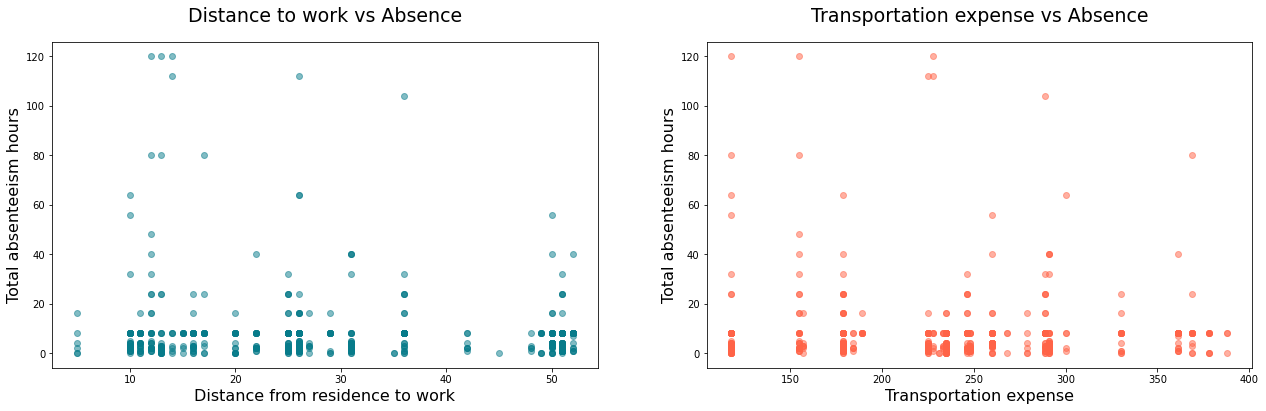

In [246]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(21.5, 6)

# correlation between distance_from_residence_to_work and absenteeism_time_in_hours

ax[0].scatter(df_clean.distance_from_residence_to_work, 
                df_clean.absenteeism_time_in_hours,
                color="#077b8a", alpha=0.5)

ax[0].set_xlabel("Distance from residence to work", fontsize=16, color="k")
ax[0].set_ylabel("Total absenteeism hours", fontsize=16, color="k")
ax[0].set_title("Distance to work vs Absence", fontsize=19, color="k", pad=20)


# correlation between Transportation expense and absenteeism_time_in_hours

ax[1].scatter(df_clean.transportation_expense, 
                df_clean.absenteeism_time_in_hours,
                color="tomato", alpha=0.5)

ax[1].set_xlabel("Transportation expense", fontsize=16, color="k")
ax[1].set_ylabel("Total absenteeism hours", fontsize=16, color="k")
ax[1].set_title("Transportation expense vs Absence", fontsize=19, color="k", pad=20)


plt.show()

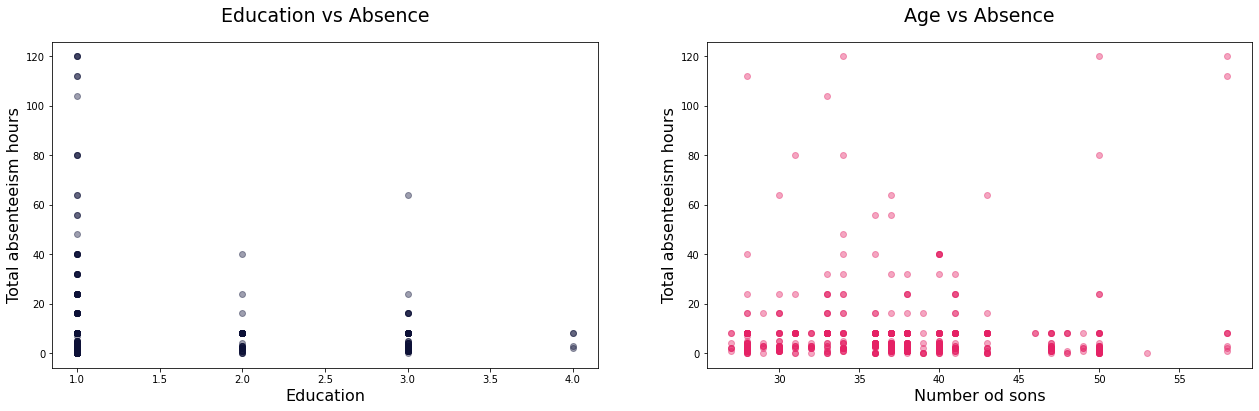

In [234]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(21.5, 6)

# correlation between education and absenteeism time_in_hours

ax[0].scatter(df_clean.education, 
                df_clean.absenteeism_time_in_hours,
                color="#0d1137", alpha=0.4)

ax[0].set_xlabel("Education", fontsize=16, color="k")
ax[0].set_ylabel("Total absenteeism hours", fontsize=16, color="k")
ax[0].set_title("Education vs Absence", fontsize=19, color="k", pad=20)


# correlation between Age and absenteeism_time_in_hours

ax[1].scatter(df_clean.age, 
                df_clean.absenteeism_time_in_hours,
                color="#e52165", alpha=0.4)

ax[1].set_xlabel("Number od sons", fontsize=16, color="k")
ax[1].set_ylabel("Total absenteeism hours", fontsize=16, color="k")
ax[1].set_title("Age vs Absence", fontsize=19, color="k", pad=20)


plt.show()

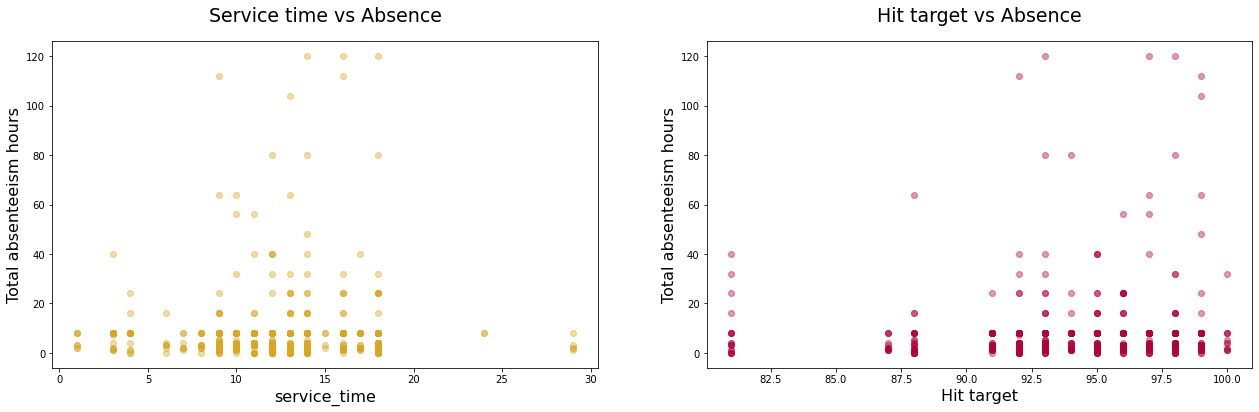

In [236]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(21.5, 6)

# correlation between service_time and absenteeism time_in_hours

ax[0].scatter(df_clean.service_time, 
                df_clean.absenteeism_time_in_hours,
                color="goldenrod", alpha=0.4)

ax[0].set_xlabel("service_time", fontsize=16, color="k")
ax[0].set_ylabel("Total absenteeism hours", fontsize=16, color="k")
ax[0].set_title("Service time vs Absence", fontsize=19, color="k", pad=20)


# correlation between Hit target and absenteeism_time_in_hours

ax[1].scatter(df_clean.hit_target, 
                df_clean.absenteeism_time_in_hours,
                color="#b20238", alpha=0.4)

ax[1].set_xlabel("Hit target", fontsize=16, color="k")
ax[1].set_ylabel("Total absenteeism hours", fontsize=16, color="k")
ax[1].set_title("Hit target vs Absence", fontsize=19, color="k", pad=20)


plt.show()

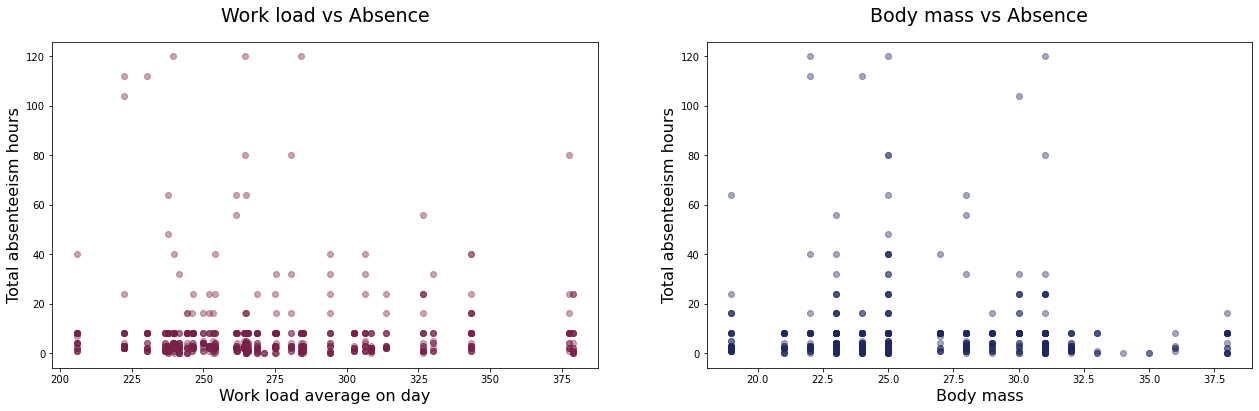

In [238]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(21.5, 6)

# correlation between work_load_average_on_day and absenteeism time_in_hours

ax[0].scatter(df_clean.work_load_average_on_day, 
                df_clean.absenteeism_time_in_hours,
                color="#7a2048", alpha=0.4)

ax[0].set_xlabel("Work load average on day", fontsize=16, color="k")
ax[0].set_ylabel("Total absenteeism hours", fontsize=16, color="k")
ax[0].set_title("Work load vs Absence", fontsize=19, color="k", pad=20)


# correlation between Body mass and absenteeism_time_in_hours

ax[1].scatter(df_clean.body_mass_index, 
                df_clean.absenteeism_time_in_hours,
                color="#1e2761", alpha=0.4)

ax[1].set_xlabel("Body mass", fontsize=16, color="k")
ax[1].set_ylabel("Total absenteeism hours", fontsize=16, color="k")
ax[1].set_title("Body mass vs Absence", fontsize=19, color="k", pad=20)


plt.show()

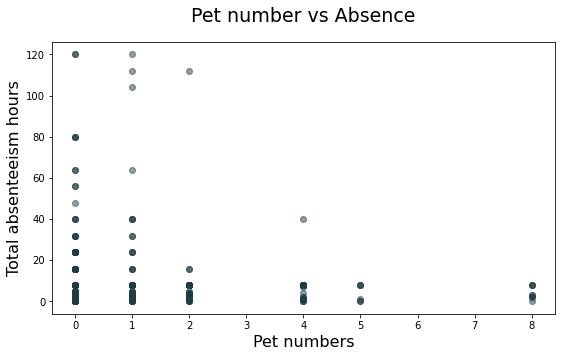

In [240]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

# correlation between pet and absenteeism time_in_hours

ax.scatter(df_clean.pet, 
                df_clean.absenteeism_time_in_hours,
                color="#1d3c45", alpha=0.5)

ax.set_xlabel("Pet numbers", fontsize=16, color="k")
ax.set_ylabel("Total absenteeism hours", fontsize=16, color="k")
ax.set_title("Pet number vs Absence", fontsize=19, color="k", pad=20)


plt.show()

### Answer 5

* **From above visualisations we can conclude that there is no strong correlation between any variable and total hours of absence.**

<a id='linreg'></a>
# Linear Regression models

### Research Question 6
> ####  Which variables are statistically significant to predict absence?

### I need another dataset copy for Regression models so I will make some changes and save  it on df_reg

In [164]:
df_reg["absence_status"] = df_clean.absence_status
df_reg["absence_level"] = df_clean.absence_level.replace({"No":0, "Low":"1","Medium":"2", "High":"3"})
df_reg["absence_reason"] = df_clean.absence_reason.replace({"No_absence":0, "Medical":"1","Not_Medical":"2"})
df_reg.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_on_day,...,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,absence_status,absence_level,absence_reason
0,11,26,7,3,1,289,36,13,33,239.554,...,1,0,1,90,172,30,4,1,2,2
1,36,0,7,3,1,118,13,18,50,239.554,...,1,0,0,98,178,31,0,0,0,0
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,0,89,170,31,2,1,0,2
3,7,7,7,5,1,279,5,14,39,239.554,...,1,1,0,68,168,24,4,1,2,1
4,11,23,7,5,1,289,36,13,33,239.554,...,1,0,1,90,172,30,2,1,0,2


In [262]:
# create linear regression model

result = smf.ols("absenteeism_time_in_hours ~  C(day_of_the_week) + C(seasons)", data = df_reg).fit()
result2 = smf.ols("absenteeism_time_in_hours ~ transportation_expense + distance_from_residence_to_work + service_time + work_load_average_on_day + hit_target", data = df_reg).fit()

result.summary(),result2.summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                 OLS Regression Results                               
 Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.022
 Model:                                   OLS   Adj. R-squared:                  0.012
 Method:                        Least Squares   F-statistic:                     2.307
 Date:                       Sat, 19 Feb 2022   Prob (F-statistic):             0.0248
 Time:                               18:54:17   Log-Likelihood:                -2958.1
 No. Observations:                        740   AIC:                             5932.
 Df Residuals:                            732   BIC:                             5969.
 Df Model:                                  7                                         
 Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025

In [260]:
result3 = smf.ols("absenteeism_time_in_hours ~ age + C(education) + weight + height + body_mass_index", data = df_reg).fit()
result4 = smf.ols("absenteeism_time_in_hours ~ son + social_drinker + social_smoker + pet", data = df_reg).fit()
result3.summary(), result4.summary() 

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                 OLS Regression Results                               
 Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.040
 Model:                                   OLS   Adj. R-squared:                  0.031
 Method:                        Least Squares   F-statistic:                     4.372
 Date:                       Sat, 19 Feb 2022   Prob (F-statistic):           9.17e-05
 Time:                               18:52:46   Log-Likelihood:                -2951.0
 No. Observations:                        740   AIC:                             5918.
 Df Residuals:                            732   BIC:                             5955.
 Df Model:                                  7                                         
 Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      

* **From all linear models we can conclude that:**
#### The variables which are statistically significant in predicting absenteeism time_in_hours with 95% confidence interval:
> * Day of the week.
> * Transportation expense.
> * Distance from residence to work.
> * Number of sons.
> * Age.

<a id='logreg'></a>

# Logestic Regression models

In [265]:
# create Logestic regression models

log_reg1 = smf.logit("absence_status ~ + C(day_of_the_week) + C(seasons)", data = df_reg).fit()
log_reg2 = smf.logit("absence_status ~ transportation_expense + distance_from_residence_to_work + service_time + work_load_average_on_day + hit_target", data = df_reg).fit()

print(log_reg1.summary());
print(log_reg2.summary());

Optimization terminated successfully.
         Current function value: 0.210027
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209892
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         absence_status   No. Observations:                  740
Model:                          Logit   Df Residuals:                      732
Method:                           MLE   Df Model:                            7
Date:                Sat, 19 Feb 2022   Pseudo R-squ.:                 0.06852
Time:                        18:57:58   Log-Likelihood:                -155.42
converged:                       True   LL-Null:                       -166.85
Covariance Type:            nonrobust   LLR p-value:                  0.001798
                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [271]:
params = np.exp(log_reg1.params)
conf = np.exp(log_reg1.conf_int())
conf['OR'] = params
pvalue=round(log_reg1.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                         CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
Intercept                   13.169555     113.381689   38.641770   0.000
C(day_of_the_week)[T.3]      0.179598       1.233865    0.470744   0.125
C(day_of_the_week)[T.4]      0.237580       1.705858    0.636614   0.369
C(day_of_the_week)[T.5]      0.255957       2.250377    0.758946   0.619
C(day_of_the_week)[T.6]      0.368809       3.492792    1.134977   0.825
C(seasons)[T.2]              0.559700       9.278497    2.278854   0.250
C(seasons)[T.3]              0.151674       1.105572    0.409496   0.078
C(seasons)[T.4]              0.116340       0.756897    0.296745   0.011


In [272]:
params = np.exp(log_reg2.params)
conf = np.exp(log_reg2.conf_int())
conf['OR'] = params
pvalue=round(log_reg2.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  \
Intercept                            0.000001       1.916703    0.001478   
transportation_expense               0.988458       0.998043    0.993239   
distance_from_residence_to_work      1.005708       1.056041    1.030567   
service_time                         0.885077       1.041112    0.959929   
work_load_average_on_day             0.990455       1.006078    0.998236   
hit_target                           1.051162       1.203155    1.124594   

                                 pvalue  
Intercept                         0.075  
transportation_expense            0.006  
distance_from_residence_to_work   0.016  
service_time                      0.323  
work_load_average_on_day          0.658  
hit_target                        0.001  


In [269]:
# create Logestic regression models

log_reg3 = smf.ols("absenteeism_time_in_hours ~ age + C(education) + weight + height + body_mass_index", data = df_reg).fit()
log_reg4 = smf.ols("absenteeism_time_in_hours ~ son + social_drinker + social_smoker + pet", data = df_reg).fit()

print(log_reg3.summary());
print(log_reg4.summary());

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.040
Model:                                   OLS   Adj. R-squared:                  0.031
Method:                        Least Squares   F-statistic:                     4.372
Date:                       Sat, 19 Feb 2022   Prob (F-statistic):           9.17e-05
Time:                               18:58:31   Log-Likelihood:                -2951.0
No. Observations:                        740   AIC:                             5918.
Df Residuals:                            732   BIC:                             5955.
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [270]:
params = np.exp(log_reg3.params)
conf = np.exp(log_reg3.conf_int())
conf['OR'] = params
pvalue=round(log_reg3.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                   CI 95%(2.5%)  CI 95%(97.5%)    Odds Ratio  pvalue
Intercept          3.914129e-48   3.536224e+75  1.176488e+14   0.653
C(education)[T.2]  7.859203e-04   2.970671e+00  4.831884e-02   0.149
C(education)[T.3]  2.354063e-03   1.750453e+00  6.419250e-02   0.103
C(education)[T.4]  1.224774e-09   3.722935e+02  6.752595e-04   0.279
age                1.072751e+00   1.497881e+00  1.267617e+00   0.005
weight             6.856184e-01   4.237136e+00  1.704423e+00   0.251
height             3.752932e-01   1.988900e+00  8.639564e-01   0.731
body_mass_index    1.073567e-02   2.101730e+00  1.502115e-01   0.159


In [257]:
params = np.exp(log_reg4.params)
conf = np.exp(log_reg4.conf_int())
conf['OR'] = params
pvalue=round(log_reg4.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
Intercept          36.161287    1142.782874  203.284283   0.000
son                 1.583963       9.840893    3.948114   0.003
social_drinker      0.345124      19.429712    2.589529   0.354
social_smoker       0.008647      16.448665    0.377145   0.612
pet                 0.337203       1.483409    0.707255   0.359


* **From all Logestic regression models we can conclude that:**
#### The variables which are statistically significant in predicting absence with 95% confidence interval:

> * Transportation expense.
> * Distance from residence to work.
> * Hit target
> * Age
> * Number of sons.

<a id='conclusions'></a>
## Conclusions

>  **1. The most frequent reason for absences is blood donation which represented by number (23) with 149 absence case.**

> **2. The top frequent reasons which causes absence are not medical reasons with percentage 53.65%.**

> **3. The best employees are:** 

      . The employees who have id numbers (4, 8 and 35) with 0 hours absence.

> **4. The worst employee is:** 

      . The employee who has id number 3 with 482 hours absence.

> **5.March has the higher absence rate with total 765 hours and January has the lowest absence rate with total 222 hours.**

> **6. Monday has the higher absence rate with total 1489 hours and Thursday has the lowest absence rate with total 553 hours.**

> **7. There is no strong correlation between any variable and total hours of absence.**

> **8. The variables which are statistically significant in predicting absenteeism time_in_hours with 95% confidence interval:**

      . Day of the week. 
      . Transportation expense.
      . Distance from residence to work.
      . Number of sons.
      . Age.
     
> **9. The variables which are statistically significant in predicting absence with 95% confidence interval:**

      . Transportation expense.
      . Distance from residence to work.
      . Hit target
      . Number of sons.